In [2]:
#Putting it All Together: UCI Breast Cancer Data Set

In [4]:
'''The dataset is provided thanks to:

Street, N.  (1990). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data]. Madison, WI: University of Wisconsin, Computer Sciences Dept.
'''

'The dataset is provided thanks to:\n\nStreet, N.  (1990). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data]. Madison, WI: University of Wisconsin, Computer Sciences Dept.\n'

In [6]:
import numpy as np
import pandas as pd
data_web_address = data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['radius',
                'texture',
                'perimeter',
                'area',
                'smoothness' 
                ,'compactness',
                'concavity',
                'concave points', 
                'symmetry',
                'malignant']

feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)
all_data.dtypes

radius             int64
texture            int64
perimeter          int64
area               int64
smoothness         int64
compactness       object
concavity          int64
concave points     int64
symmetry           int64
malignant          int64
dtype: object

0    444
1    239
Name: malignant, dtype: int64
Accuracy: 0.9854014598540146
Confusion Matrix:
[[87  2]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.96      1.00      0.98        48

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137

ROC AUC Score: 0.9934456928838952


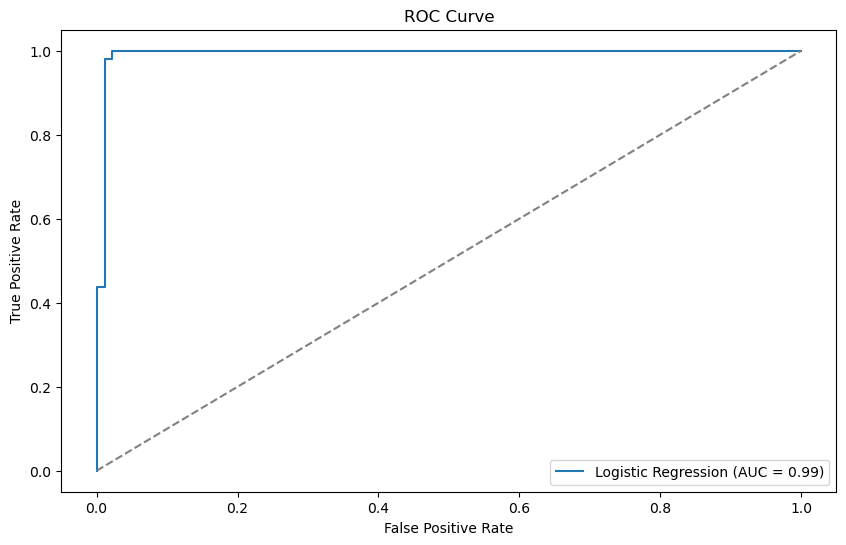

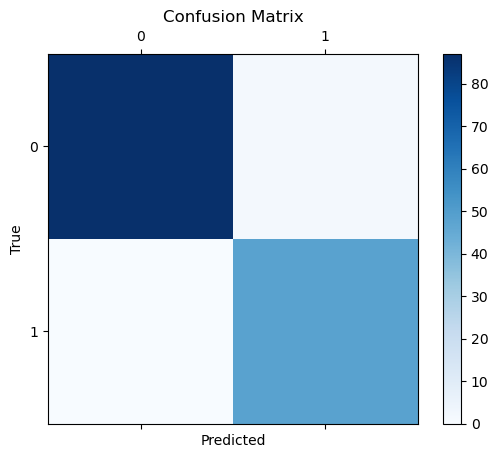

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['id', 'clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 
                'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 
                'bland_chromatin', 'normal_nucleoli', 'mitoses', 'malignant']
all_data = pd.read_csv(data_web_address, names=column_names)

# Drop the 'id' column as it is not useful for prediction
all_data = all_data.drop(columns=['id'])

# Replace missing values represented as '?' with NaN and then drop those rows
all_data = all_data.replace('?', np.nan)
all_data = all_data.dropna()

# Convert columns to appropriate data types
all_data = all_data.astype(np.int64)

# Change the state of having cancer to 1, not having cancer to 0
all_data['malignant'] = np.where(all_data['malignant'] == 4, 1, 0) # 4 means malignant

# Display the distribution of the target variable
print(all_data['malignant'].value_counts())

# Split the data into features and target
X = all_data.drop(columns=['malignant'])
y = all_data['malignant']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Initialize and fit the Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


0    444
1    239
Name: malignant, dtype: int64
Accuracy: 0.9854014598540146
Confusion Matrix:
[[87  2]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.96      1.00      0.98        48

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137

ROC AUC Score: 0.9934456928838952


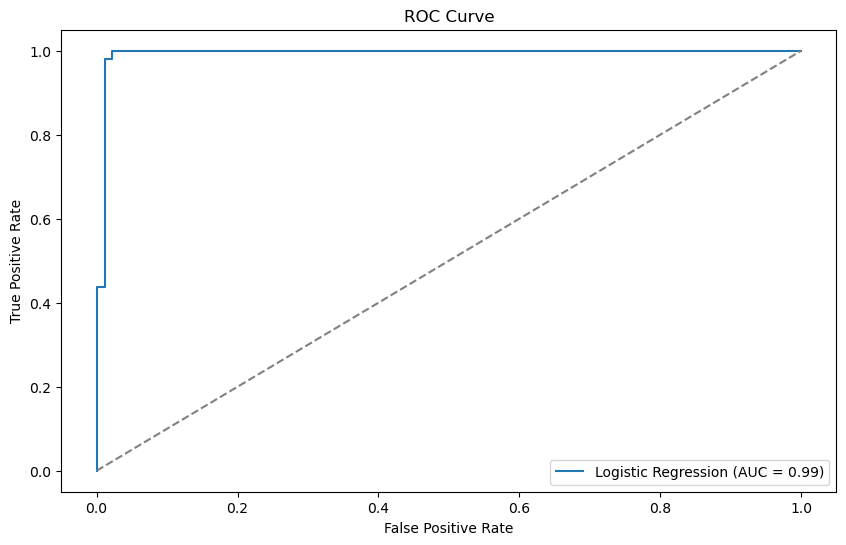

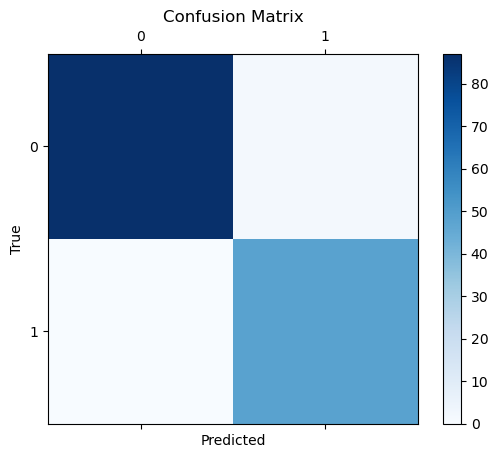

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['id', 'clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 
                'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 
                'bland_chromatin', 'normal_nucleoli', 'mitoses', 'malignant']
all_data = pd.read_csv(data_web_address, names=column_names)

# Drop the 'id' column as it is not useful for prediction
all_data = all_data.drop(columns=['id'])

# Replace missing values represented as '?' with NaN and then drop those rows
all_data = all_data.replace('?', np.nan)
all_data = all_data.dropna()

# Convert columns to appropriate data types
all_data = all_data.astype(np.int64)

# Change the state of having cancer to 1, not having cancer to 0
all_data['malignant'] = np.where(all_data['malignant'] == 4, 1, 0) # 4 means malignant

# Display the distribution of the target variable
print(all_data['malignant'].value_counts())

# Select features excluding 'compactness'
X = all_data.drop(columns=['malignant'])
y = all_data['malignant']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Initialize and fit the Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


0    444
1    239
Name: malignant, dtype: int64
Accuracy: 0.9854014598540146
Confusion Matrix:
[[87  2]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.96      1.00      0.98        48

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137

ROC AUC Score: 0.9934456928838952


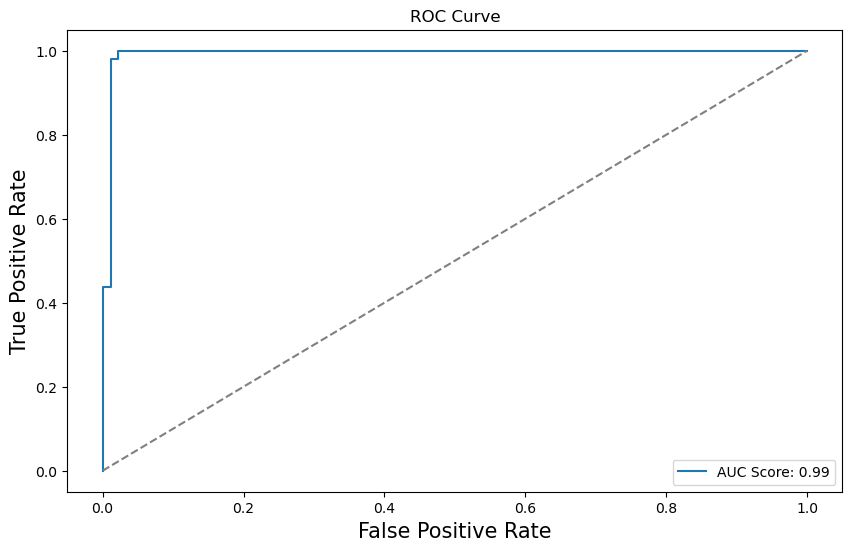

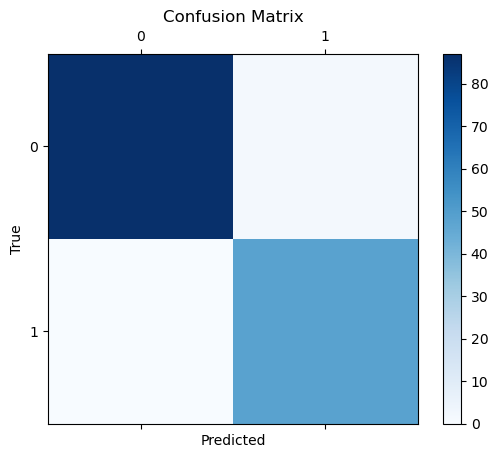

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['id', 'clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 
                'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 
                'bland_chromatin', 'normal_nucleoli', 'mitoses', 'malignant']
all_data = pd.read_csv(data_web_address, names=column_names)

# Drop the 'id' column as it is not useful for prediction
all_data = all_data.drop(columns=['id'])

# Replace missing values represented as '?' with NaN and then drop those rows
all_data = all_data.replace('?', np.nan)
all_data = all_data.dropna()

# Convert columns to appropriate data types
all_data = all_data.astype(np.int64)

# Change the state of having cancer to 1, not having cancer to 0
all_data['malignant'] = np.where(all_data['malignant'] == 4, 1, 0) # 4 means malignant

# Display the distribution of the target variable
print(all_data['malignant'].value_counts())

# Select features excluding 'compactness'
X = all_data.drop(columns=['malignant'])
y = all_data['malignant']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Initialize and fit the Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC Score: {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
